# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Processes of the Project
1. Read the data
2. Check for missing data and replace missing data by mean if necessary -done
3. Check for outliers
    - boxplot?
    - histogram?
    - remove outliner?
4. Check for correlation
    - heatmap
5. Partition the data
6. Linear Regression
7. Decision Tree test
8. Random Tree Test
9. Conclusion

## Loading of the dataset
To read the data set from "ExtraaLearn.csv"

In [ ]:
# read the csv file and create a copy of it to avoid changes to the original data
project_assignment = pd.read_csv('ExtraaLearn.csv')
df = project_assignment.copy()

In [ ]:
df.head()  ## To display the top 5 rows of the dataset

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
df.tail() ## to display the last 5 rows of the dataset

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
df.shape ## provide dimension on the size  of the data

(4612, 15)

In [ ]:
df.info() ## provode a quick overview of the data.frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
# check the unique values in each columns
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [ ]:
# to check for missing datas with the database
df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

## Observation
- The data set has **15 columns and 4612 observation**
- There is no missing value within the data set
- There is 4 columns of numerical - integer data and 1 column of numerical - float.
- There is 10 columns of categorical data
- **ID is an identifier** which is unique for each individual and we **can drop this column** as it would not add any value to our analysis.
    -  **lets drop the column mentioned above** and define lists for numerical and categorical column to explore them separately


In [ ]:
# to drop columns, the axis = 1, and axis = 0 if it is required to drop the rows
df=df.drop(['ID'],axis=1)

In [ ]:
# creating numerical columns
col_num =['age','website_visits','time_spent_on_website','page_views_per_visit','status']

In [ ]:
# creating categorical columns

col_cat =['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1'
        ,'print_media_type2','digital_media','educational_channels','referral']

### Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [ ]:
# statistical summary for col_num
df[col_num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [ ]:
# Statistical summary for col_cat
df[col_cat].describe().T

,count,unique,top,freq
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


## Observation
- The mean and median is very near to each other for age which is around 46 years and 51 years
- Time spent on websites seems like there are possibilities of outliers as the mean and median are of great difference
- The "No" answer is pretty on the print media type 1 & 2, digital media , educational channels and referral that majority are not converted to paid customers

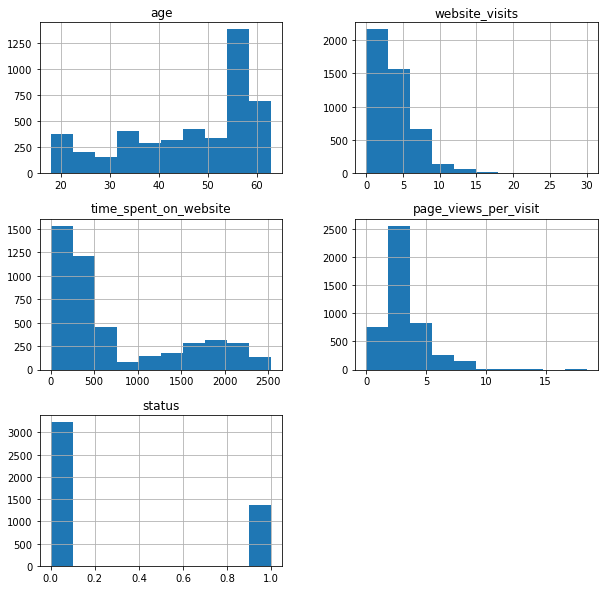

In [ ]:
# plot a general histogram but no able to observe for any outliers
df[col_num].hist(figsize = (10,10))
plt.show()

## Observation

The barplot did not indicate all the histogram plotted follows the normal distribution

## **Exploratory Data Analysis**

### Plot Box Plot

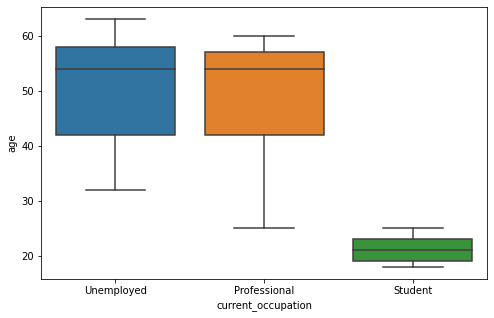

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = df, x = df["current_occupation"], y = df["age"])
plt.show()

### Observation from the box plot
- Student has an mean age of approxiamte 20 years

- Professional and unemployed have a mean age of about 55 years


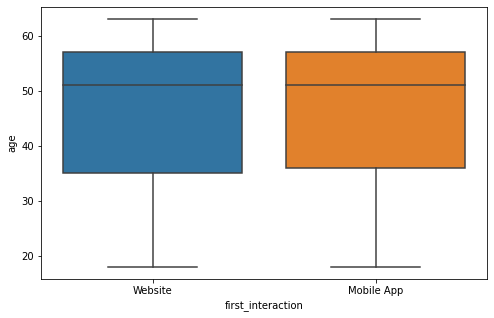

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x=df["first_interaction"],y=df["age"])
plt.show()

## Observation

first interaction for both website and Mobile app are approximate 52 years


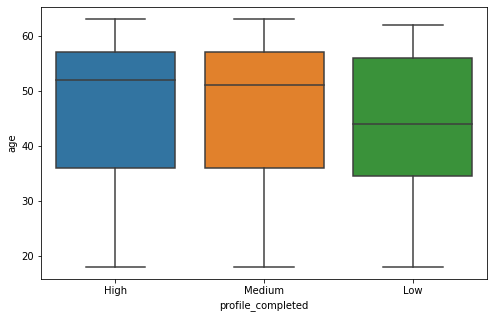

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = df, x = df["profile_completed"], y = df["age"])
plt.show()

## Observation

- The approximate age of completing the profile is approxumate 52 years for High and Medium Profile
- Low profile has a completion age of around 43 to 44 years


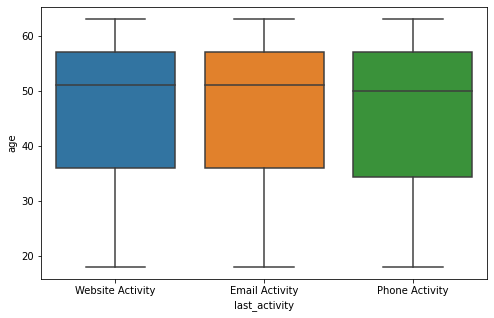

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = df, x = df["last_activity"], y = df["age"])
plt.show()

## Observation
the average age for website Activity, Email Activity and Phone Activity is approximate 52 years and 50 years old respectively

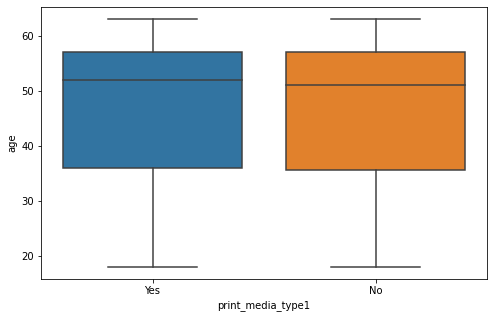

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = df, x = df["print_media_type1"], y = df["age"])
plt.show()

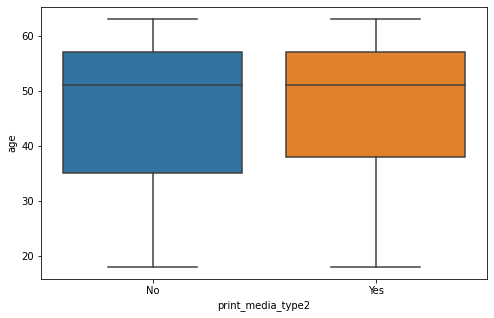

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = df, x = df["print_media_type2"], y = df["age"])
plt.show()

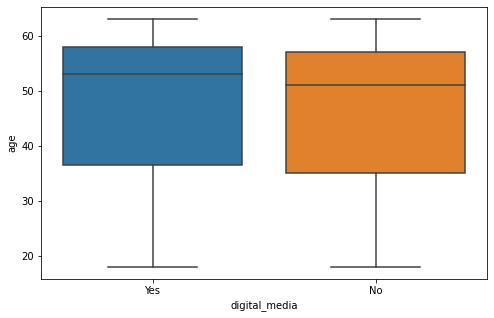

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = df, x = df["digital_media"], y = df["age"])
plt.show()

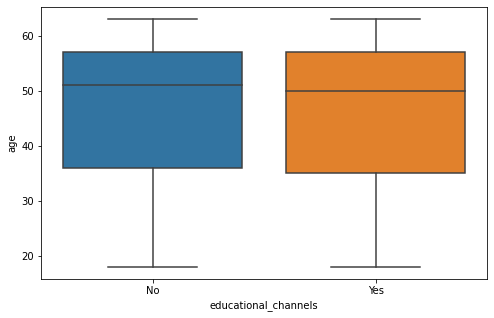

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = df, x = df["educational_channels"], y = df["age"])
plt.show()

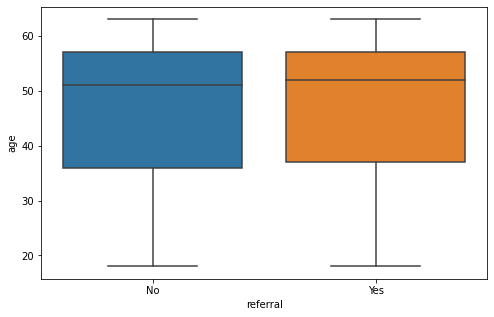

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = df, x = df["referral"], y = df["age"])
plt.show()

## Observation

- the print_media, digital media and educational channels show an approximate age of 52 years


### **Check the count of each unique category in each of the categorical variables.**

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     4085
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
No     3907
Yes     705
Name: educational_channels, dtype: int64
--------------------------

In [ ]:
# Printing the % sub categories of each category

for i in col_cat:
    print(df[i].value_counts(normalize=True)*100)
    print()
    print('*'*50)

Professional    56.721596
Unemployed      31.244579
Student         12.033825
Name: current_occupation, dtype: float64

**************************************************
Website       55.117086
Mobile App    44.882914
Name: first_interaction, dtype: float64

**************************************************
High      49.089332
Medium    48.590633
Low        2.320035
Name: profile_completed, dtype: float64

**************************************************
Email Activity      49.392888
Phone Activity      26.756288
Website Activity    23.850824
Name: last_activity, dtype: float64

**************************************************
No     89.223764
Yes    10.776236
Name: print_media_type1, dtype: float64

**************************************************
No     94.947962
Yes     5.052038
Name: print_media_type2, dtype: float64

**************************************************
No     88.573287
Yes    11.426713
Name: digital_media, dtype: float64

************************************

### Observation

- There is about 56% of professional browsing the web Extraalearn
- 55% of first interaction with Extraalearn is via the website
- 49% preferred goes along with email activity compare to phone and website activity
- In general, approximate of 90% did not comes aware of Extraalearn via the print media channels, educational channels or via the referral methods


In [ ]:
pd.crosstab(df['current_occupation'],df['status'],normalize='index')*100

status,0,1
current_occupation,,
Professional,64.487768,35.512232
Student,88.288288,11.711712
Unemployed,73.421235,26.578765


## Observation
- about 35% of the professional will be converted to paid customers compare to students which they have only 11 %

In [ ]:
pd.crosstab(df['first_interaction'],df['status'],normalize='index')*100

status,0,1
first_interaction,,
Mobile App,89.468599,10.531401
Website,54.405980,45.594020


## Observation
 - a high percentage of 45.6 was converted to paid customers via the first interaction throug website

In [ ]:
pd.crosstab(df['profile_completed'],df['status'],normalize='index')*100

status,0,1
profile_completed,,
High,58.215548,41.784452
Low,92.523364,7.476636
Medium,81.124498,18.875502


## Observation

- an approximate of 42 % of the high - profile completed are being converted to paid customer

In [ ]:
pd.crosstab(df['last_activity'],df['status'],normalize='index')*100

status,0,1
last_activity,,
Email Activity,69.666374,30.333626
Phone Activity,78.687196,21.312804
Website Activity,61.545455,38.454545


In [ ]:
pd.crosstab(df['print_media_type1'],df['status'],normalize='index')*100

status,0,1
print_media_type1,,
No,70.400972,29.599028
Yes,68.008048,31.991952


In [ ]:
pd.crosstab(df['print_media_type2'],df['status'],normalize='index')*100

status,0,1
print_media_type2,,
No,70.267184,29.732816
Yes,67.811159,32.188841


In [ ]:
pd.crosstab(df['digital_media'],df['status'],normalize='index')*100

status,0,1
digital_media,,
No,70.403917,29.596083
Yes,68.121442,31.878558


In [ ]:
pd.crosstab(df['educational_channels'],df['status'],normalize='index')*100

status,0,1
educational_channels,,
No,69.797799,30.202201
Yes,72.056738,27.943262


## Observation

- those in print_media, digital_media and educational_channels did not have a good response to be converted to paid customers.
- there is approximate of 70% not converted to paid customers

In [ ]:
pd.crosstab(df['referral'],df['status'],normalize='index')*100

status,0,1
referral,,
No,70.922771,29.077229
Yes,32.258065,67.741935


## Observation,
- 35.5% of the professional convert to paid customers with an average age of 49.3 years
- 11.71% of the student from a pool of 555 convert to paid customers with an average age of 21 years old
- 26.58 % of the Unexmployed convert to paid customers with an average age of 40.14 years
- Approximate 70% of the surveyed in media n channels did not convert to a paid customers


In [ ]:
df.groupby(["educational_channels"])['status'].describe().T


educational_channels,No,Yes
count,3907.000000,705.000000
mean,0.302022,0.279433
std,0.459194,0.449039
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
## function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(10, 8), kde=False, bins=None):
    """
    Boxplot and histogram combined

    df: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram

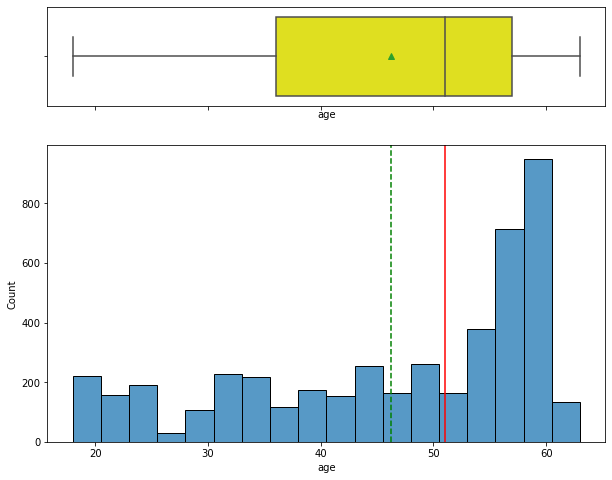

In [ ]:
histogram_boxplot(df,'age')

## Observation
- It shown that the age does not have any outliners
- It does not seems like following the normal distribution
- It is left skewed which means than the 'mean' is less than the 'median'.
    - possible cause is the participations (i.e pax of the age group )is not balance

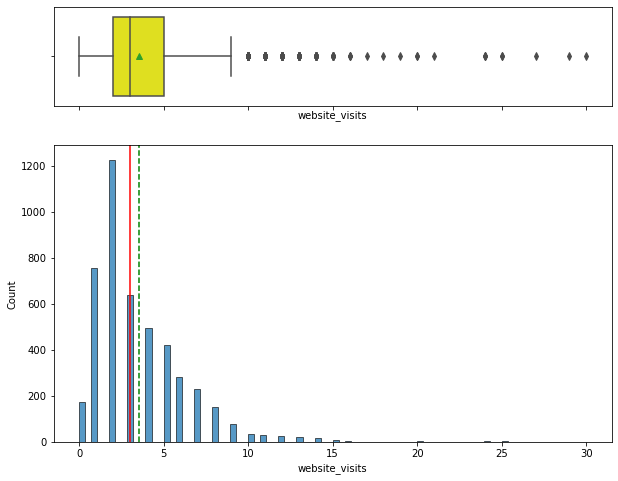

In [ ]:
histogram_boxplot(df,'website_visits')

## Observation
- it is right skewed as it does observe that there are outliers / extreme values observed


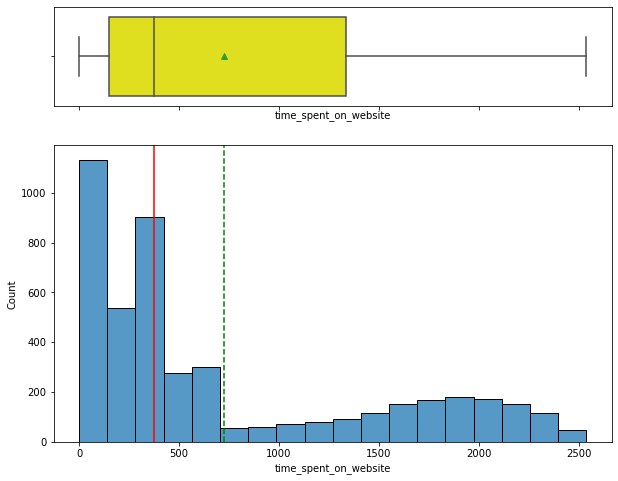

In [ ]:
histogram_boxplot(df,'time_spent_on_website')

In [ ]:
## Observation

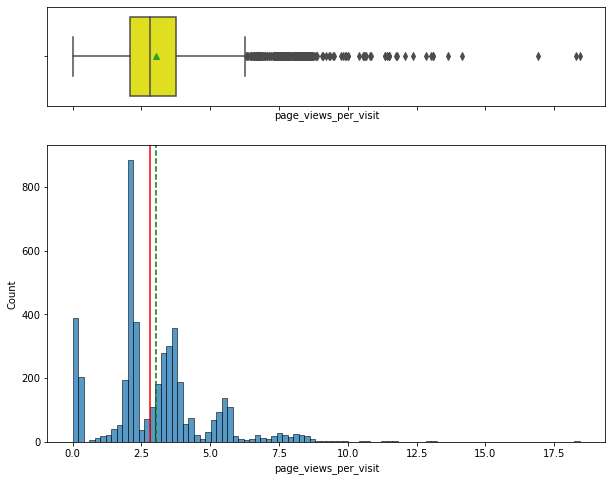

In [ ]:
histogram_boxplot(df,'page_views_per_visit')

### Observation

it seems like they are some outliers in websites visit & page view

#### **Let's understand the distribution of the categorical variables**

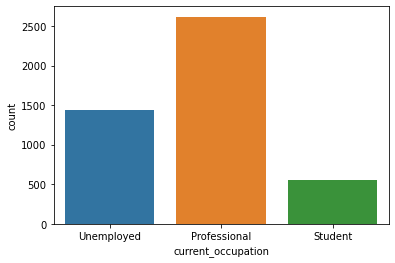

In [ ]:
sns.countplot(x = df['current_occupation'])
plt.show()

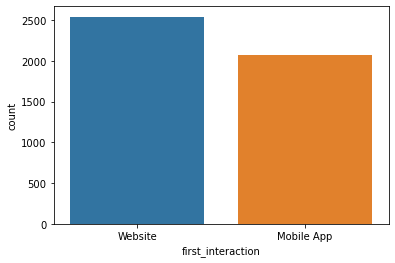

In [ ]:
sns.countplot(x = df['first_interaction'])
plt.show()

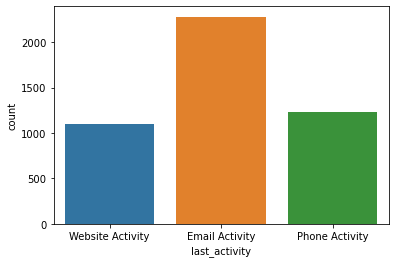

In [ ]:
sns.countplot(x = df['last_activity'])
plt.show()

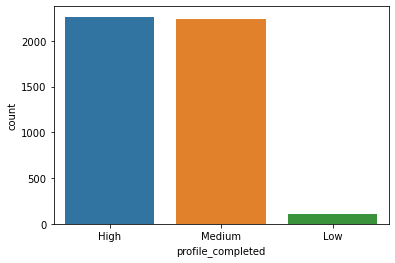

In [ ]:
sns.countplot(x = df['profile_completed'])
plt.show()

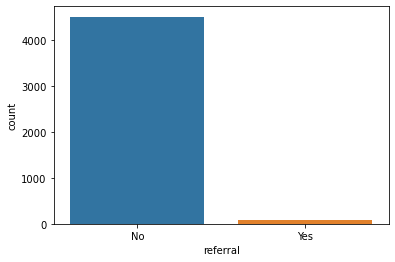

In [ ]:
sns.countplot(x = df['referral'])
plt.show()

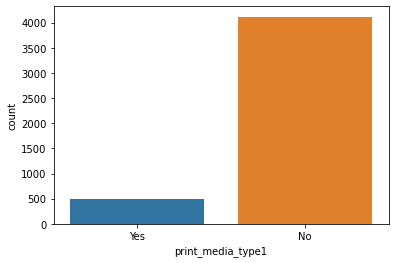

In [ ]:
sns.countplot(x = df['print_media_type1'])
plt.show()

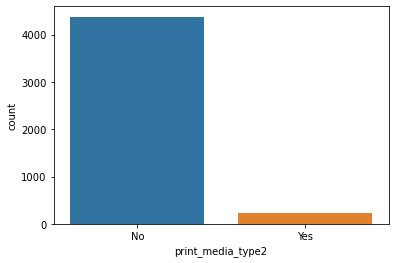

In [ ]:
sns.countplot(x = df['print_media_type2'])
plt.show()

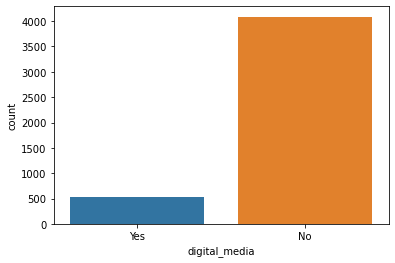

In [ ]:
sns.countplot(x = df['digital_media'])
plt.show()

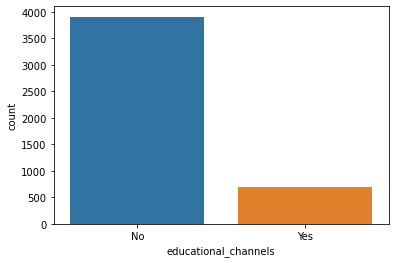

In [ ]:
sns.countplot(x = df['educational_channels'])
plt.show()

### To understand within each categorical, how many are converted to paid customer

In [ ]:
# Defining the stacked_barplot() function
def stacked_barplot(df,predictor,target,figsize=(10,6)):
  (pd.crosstab(df[predictor],df[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel(target)

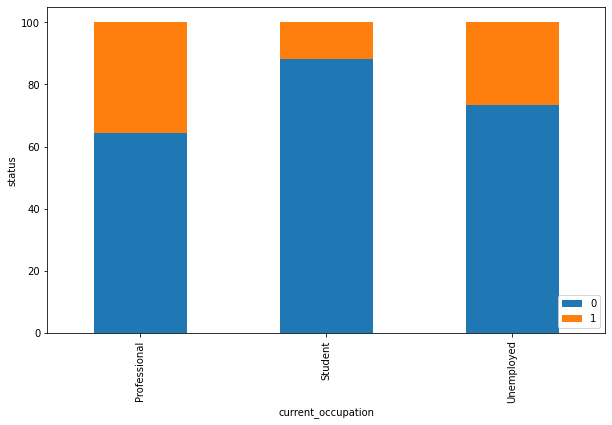

In [ ]:
stacked_barplot(df,'current_occupation','status')

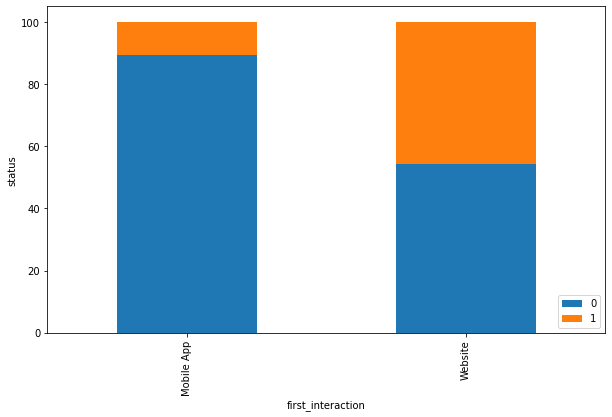

In [ ]:
stacked_barplot(df,'first_interaction','status')

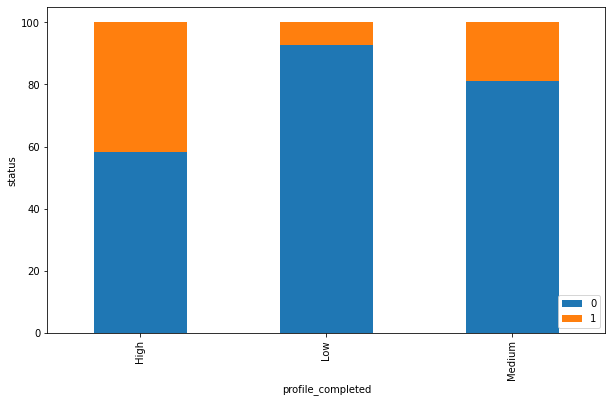

In [ ]:
stacked_barplot(df,'profile_completed','status')

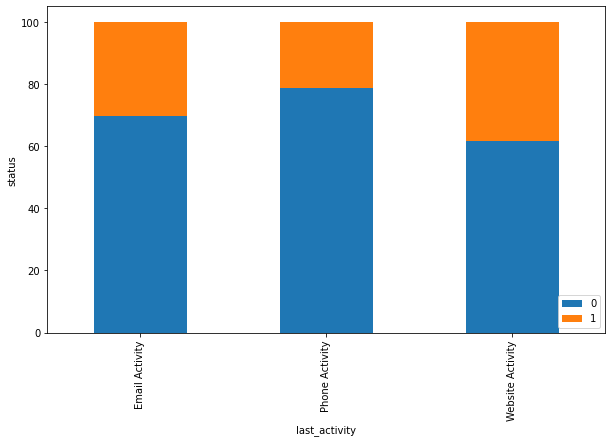

In [ ]:
stacked_barplot(df,'last_activity','status')

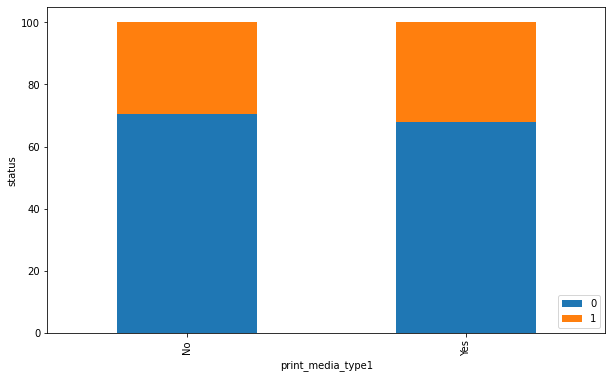

In [ ]:
stacked_barplot(df,'print_media_type1','status')

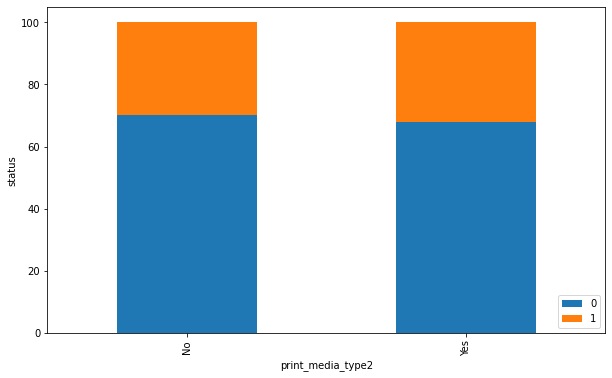

In [ ]:
stacked_barplot(df,'print_media_type2','status')

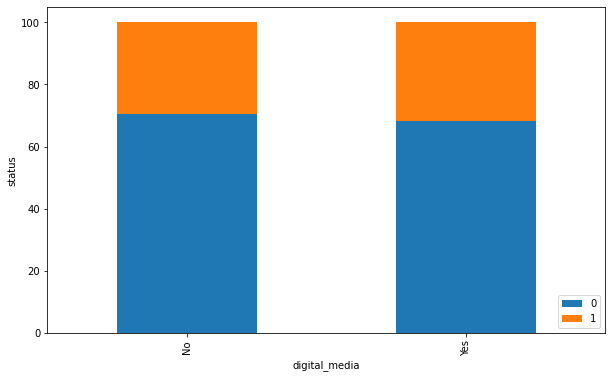

In [ ]:
stacked_barplot(df,'digital_media','status')

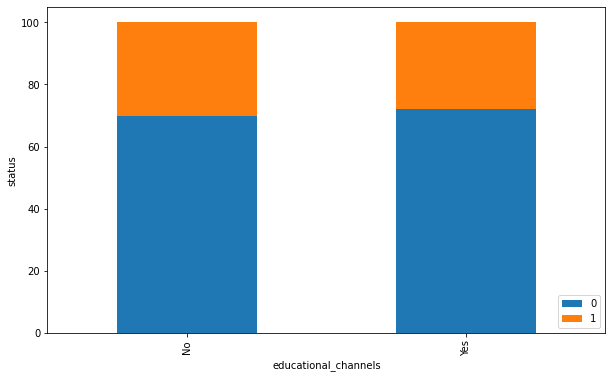

In [ ]:
stacked_barplot(df,'educational_channels','status')

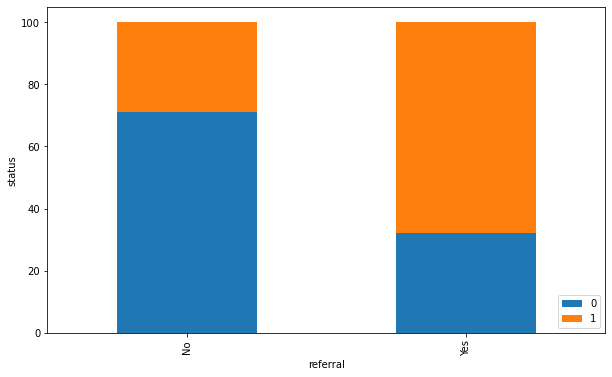

In [ ]:
stacked_barplot(df,'referral','status')

#### *visualize the correlation matrix using a heatmap**



<AxesSubplot:>

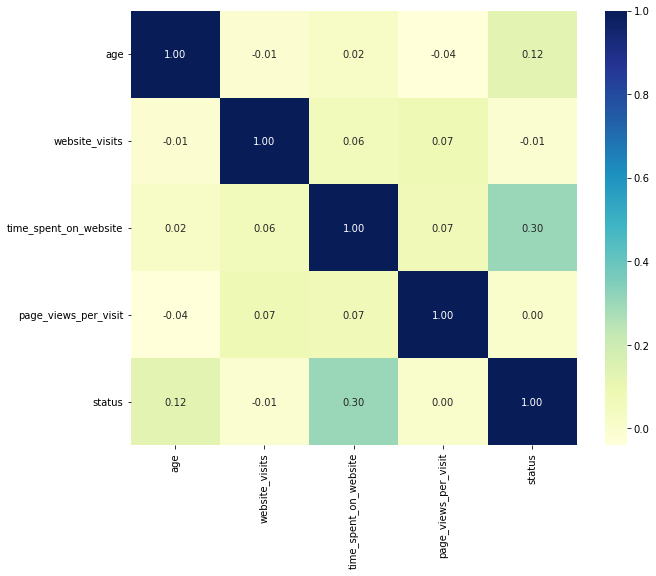

In [ ]:
# plotting the correlation between numerical variables
plt.figure(figsize = (10,8))
sns.heatmap(df[col_num].corr(),annot=True,fmt='0.2f', cmap='YlGnBu')

## Observation

It shown that most of the numerical data are not correlated

## **Data Preparation for Modeling**


In [ ]:
# Separating target variable and other variables
X=df.drop(columns='status')
Y=df['status']

In [ ]:
# Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [ ]:
# Checking that no column has missing values in train or test sets
print('TRAIN SET')
print(X_train.isna().sum())
print('-'*30)
print()
print('TEST SET')
print(X_test.isna().sum())

TRAIN SET
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
dtype: int64
------------------------------

TEST SET
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
dtype: int64


In [ ]:
#List of columns to create a dummy variables
col_dummy=['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2','digital_media','educational_channels','referral']

In [ ]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2264
           1       0.72      0.62      0.67       964

    accuracy                           0.82      3228
   macro avg       0.79      0.76      0.77      3228
weighted avg       0.81      0.82      0.81      3228



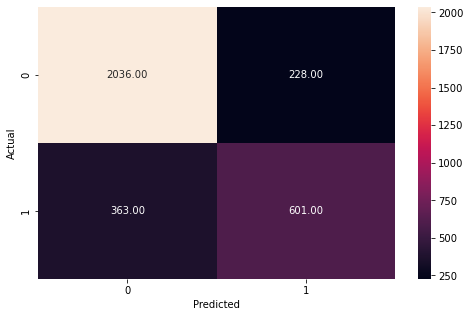

In [ ]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

## Observation on Trained Data
- Accuracy is 82%
- Recall is 62%

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       971
           1       0.76      0.61      0.67       413

    accuracy                           0.82      1384
   macro avg       0.80      0.76      0.78      1384
weighted avg       0.82      0.82      0.82      1384



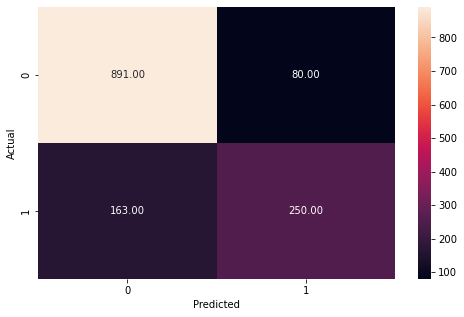

In [ ]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

## Observation on the test data
- Accuracy is 82%
- Recall is 61%

### Observation

Basing on the train data and test data on linear regression, it show that the model is generalizing well and it is not overfitting

### Decision Tree Model

## Building a Decision Tree model

In [ ]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



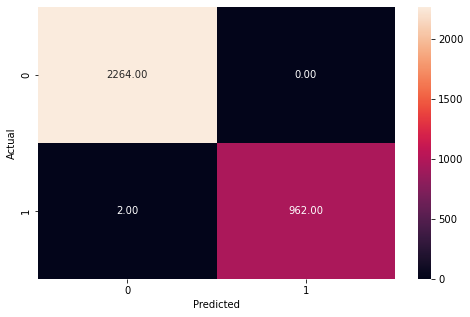

In [ ]:
 # Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       971
           1       0.68      0.67      0.68       413

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



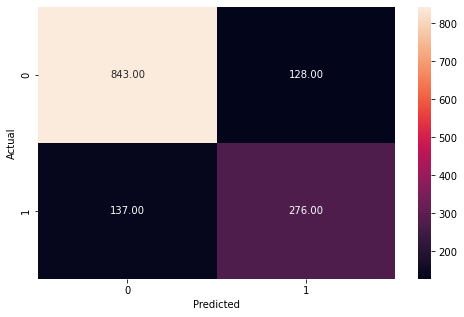

In [ ]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

### Observation

It suggest that there is a potential of the decision tree is overfitting, further steps needs to be taken to address the unseen issue

 ### Observation
 ** Perform hyperparameter tuning for the decision tree model using GridSearch CV **

## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2264
           1       0.81      0.83      0.82       964

    accuracy                           0.89      3228
   macro avg       0.87      0.88      0.87      3228
weighted avg       0.89      0.89      0.89      3228



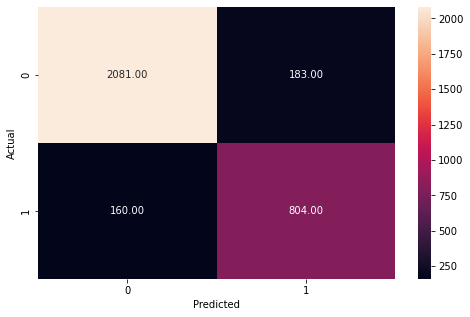

In [ ]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       971
           1       0.75      0.77      0.76       413

    accuracy                           0.85      1384
   macro avg       0.82      0.83      0.83      1384
weighted avg       0.85      0.85      0.85      1384



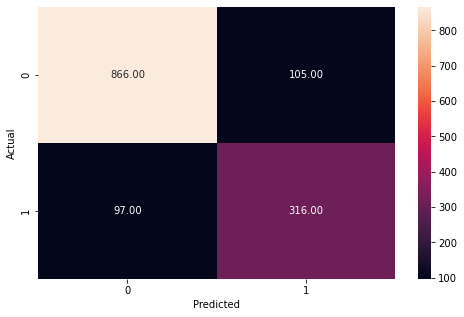

In [ ]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

## Observation
- After pruning, the outcome on the trained data and test data on the accuracy is about close to each other in the range of 80%


## To plot the tree

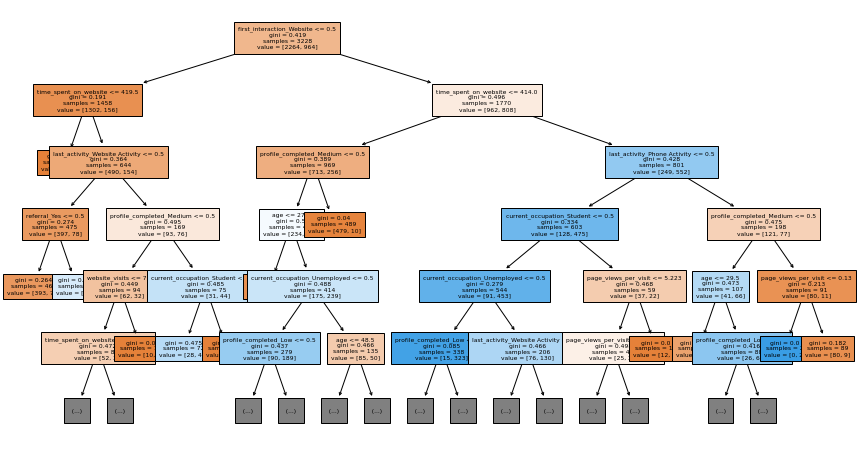

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(15, 8))
out = tree.plot_tree(
    estimator,
    max_depth=5,
    feature_names=feature_names,
    filled=True,
    fontsize=6,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## to show some of the importance features

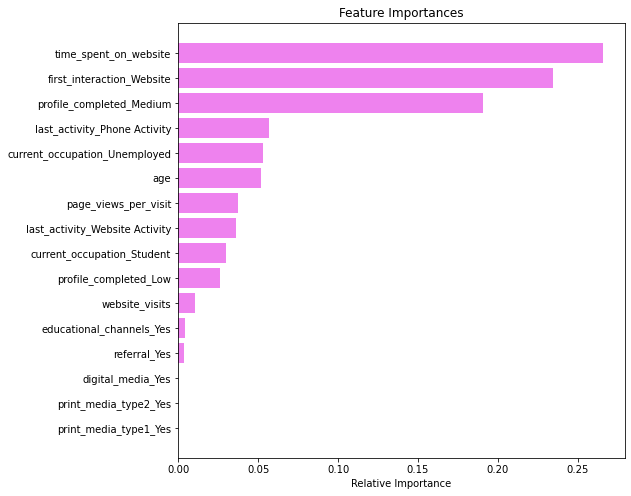

In [ ]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation
The time spent on the website, first interaction and the medium completed profile has great importance features to convert to the paid customers

### Random Forest Tree

## Building a Random Forest model

In [ ]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



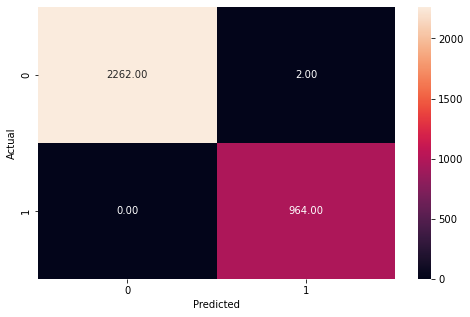

In [ ]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

In [ ]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



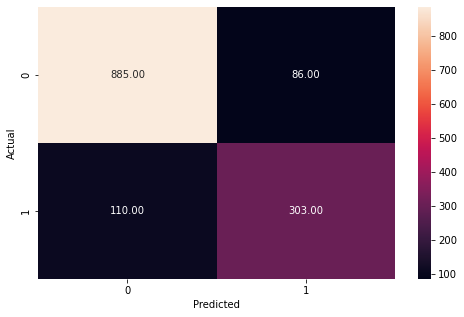

In [ ]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

## Do we need to prune the tree?

No,we do not required pruning of the trees as random forest does have any techniques to overcome overfitting and improve generalization

## Importance features

<AxesSubplot:title={'center':'Feature Importances'}, xlabel='Importance'>

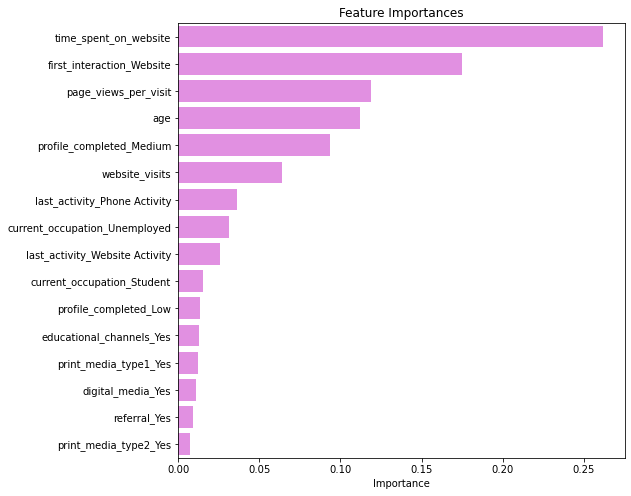

In [ ]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

## Actionable Insights and Recommendations

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.

Now, let's build another model - **a random forest classifier.**

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**


### Observation
- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
- Unlike the decision tree, **the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.